In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tickers = ['PG','MSFT','F','GE']

In [5]:
ticker_data = pd.DataFrame()
for ticker in tickers:
    ticker_data[ticker] = web.DataReader(ticker,data_source='yahoo',
                                        start='1995-1-1')['Adj Close']

In [6]:
ticker_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6389 entries, 1995-01-03 to 2020-05-18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6389 non-null   float64
 1   MSFT    6389 non-null   float64
 2   F       6389 non-null   float64
 3   GE      6389 non-null   float64
dtypes: float64(4)
memory usage: 249.6 KB


In [7]:
ticker_data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.413537,3.256691,2.729230
1995-01-04,6.269589,2.431082,3.344314,2.729230
1995-01-05,6.180927,2.390982,3.315107,2.735919
1995-01-06,6.193593,2.431082,3.315107,2.722540
1995-01-09,6.168259,2.416045,3.373522,2.695783


In [8]:
ticker_data.tail()

,PG,MSFT,F,GE
Date,,,,
2020-05-12,114.550003,182.509995,4.98,6.00
2020-05-13,113.919998,179.750000,4.72,5.79
2020-05-14,113.809998,180.529999,4.89,5.70
2020-05-15,114.610001,183.160004,4.90,5.49
2020-05-18,115.910004,185.104996,5.24,6.19


# Normalization to 100

(Price of current time / Price of original time ) * 100

In [15]:
ticker_data.iloc[0]

PG      6.320252
MSFT    2.413537
F       3.256691
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

In [11]:
normalized = ticker_data / ticker_data.iloc[0] * 100

In [12]:
type(normalized)

pandas.core.frame.DataFrame

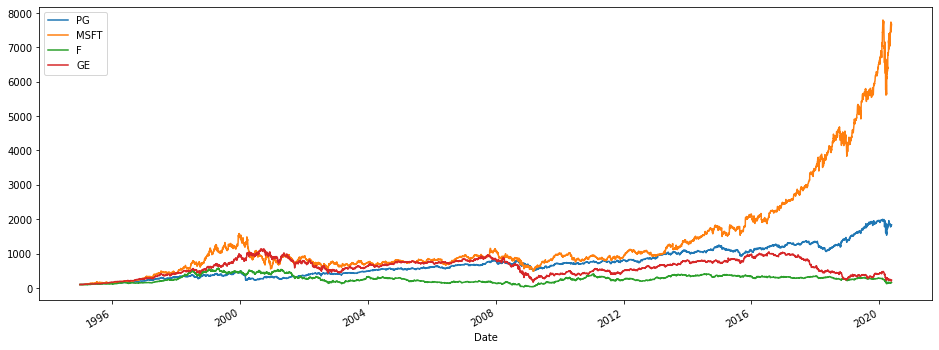

In [13]:
normalized.plot(figsize=(16,6));

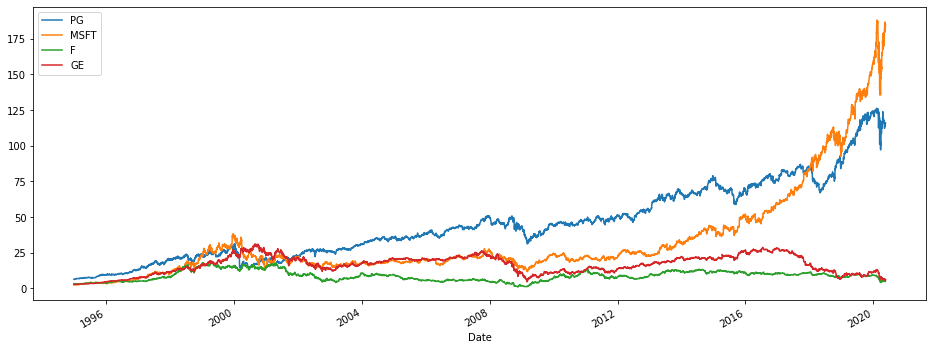

In [20]:
# without normalization
ticker_data.plot(figsize=(16,6));

In [17]:
ticker_data.loc['2020-05-01']

PG      116.820000
MSFT    174.570007
F         4.920000
GE        6.500000
Name: 2020-05-01 00:00:00, dtype: float64

In [18]:
ticker_data.iloc[10]

PG      6.556666
MSFT    2.591484
F       3.358917
GE      2.782744
Name: 1995-01-17 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

Simple returns is preferred over a time period

In [21]:
returns = (ticker_data/ticker_data.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [22]:
weights = np.array([0.25,0.25,0.25,0.25])

In [24]:
# calculates the vector or matrix products
np.dot(returns,weights)

array([        nan,  0.00653978, -0.0092298 , ...,  0.00596166,
       -0.00329989,  0.05471356])

In [28]:
# we need to estimate the average return of each stock price first

# let's consider annual returns
annual_returns = returns.mean() * 250
annual_returns

PG      0.139831
MSFT    0.219991
F       0.098046
GE      0.081829
dtype: float64

In [30]:
np.dot(annual_returns,weights)

0.13492428795061984

In [27]:
# obtained a single number

In [31]:
str(round(np.dot(annual_returns,weights),5)* 100) + ' %'

'13.492 %'

In [32]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [33]:
str(round(np.dot(annual_returns,weights_2),5)* 100) + ' %'

'16.273 %'